<a href="https://colab.research.google.com/github/LilySaya/Fundamentals_of_AI/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

def euclidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

  def __init__(self, K= 5, max_iters = 100, plot_steps = False):
    self.K = K
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    #list of sample indices for each cluster
    self.clusters = [[] for _ in range(self.K)]

    #mean feature vector for each cluster
    self.centroids = []

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    #initialise centroids, randomly pick some samples
    random_sample_indexes = np.random.choice(self.n_samples,self.K, replace = False)
    self.centroids = [self.X[index] for index in random_sample_indexes]

    #optimization
    for _ in range(self.max_iters):
      #update clusters
      self.clusters = self.create_clusters(self.centroids)
      if self.plot_steps:
        self.plot()

      #update centroids
      centroids_old = self.centroids
      self.centroids = self.get_centroids(self.clusters)
      if self.plot_steps:
        self.plot()
      #check for convergence
      if self.is_converged(centroids_old, self.centroids):
        break
    #return cluster labels
    return self.get_cluster_labels(self.clusters)

  def create_clusters(self, centroids):
    clusters = [[] for _ in range(self.K)]
    for index, sample in enumerate(self.X):
      centroid_index = self.closet_centroid(sample,centroids)
      clusters[centroid_index].append(index)
    return clusters

  def closet_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample, point) for point in centroids]
    closest_index = np.argmin(distances)
    return closest_index

  #get centroid of each cluster
  def get_centroids(self, clusters):
    centroids = np.zeros((self.K, self.n_features))
    for cluster_index, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis = 0)
      centroids[cluster_index] = cluster_mean
    return centroids

  #for each cluster, check convergence
  def is_converged(self, centroids_old, centroids):
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
    return sum(distances) == 0

  def get_cluster_labels(self, clusters):
    labels = np.empty(self.n_samples)
    #lables are just indexes of the clusters sample was assigned to
    for cluster_index, cluster in enumerate(clusters):
      for sample_index in cluster:
        labels[sample_index] = cluster_index
    return labels

  def plot(self):
    fig, ax = plt.subplots(figsize = (6,4))
    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point, s = 13, alpha = 0.8, cmap=plt.cm.get_cmap("winter", self.K))

    for point in self.centroids:
      ax.scatter(*point, marker = "x", color = "black", linewidth = 2)
    plt.title(f"{self.K} - means")
    plt.show()



<ipython-input-1-ebfb248ea8f3>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(*point, s = 13, alpha = 0.8, cmap=plt.cm.get_cmap("winter", self.K))
<ipython-input-1-ebfb248ea8f3>:85: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(*point, s = 13, alpha = 0.8, cmap=plt.cm.get_cmap("winter", self.K))


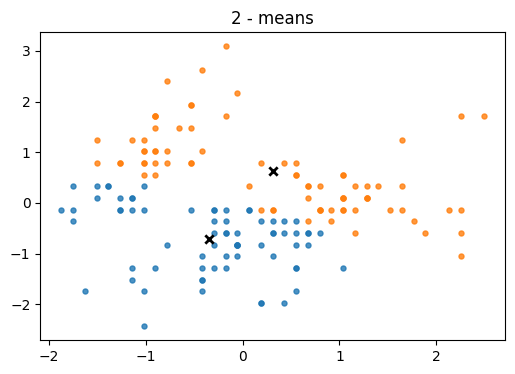

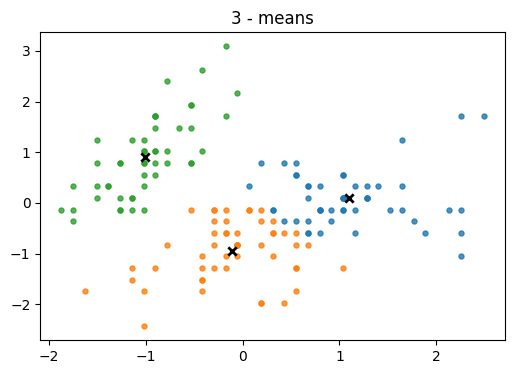

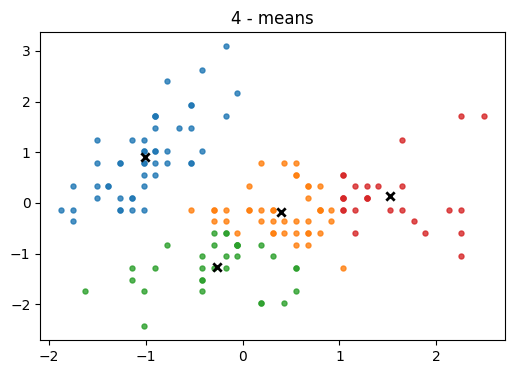

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

data = datasets.load_iris()
x = data.data
sc = StandardScaler()
X = sc.fit_transform(x)
X = X[:,0:2]

repeat = [2,3,4]
for num in repeat:
  k = KMeans(K = num, max_iters = 150, plot_steps = False)
  y_pred = k.predict(X)

  k.plot()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-3-2826e5c69423>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:,0],X[:,1], c = k.labels_, alpha = 0.8, s = 13, cmap=plt.cm.get_cmap("winter", num))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-3-2826e5c69423>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib

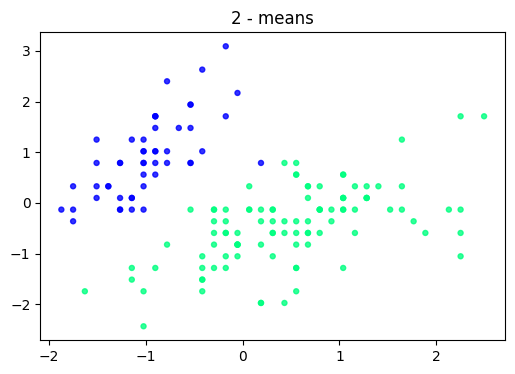

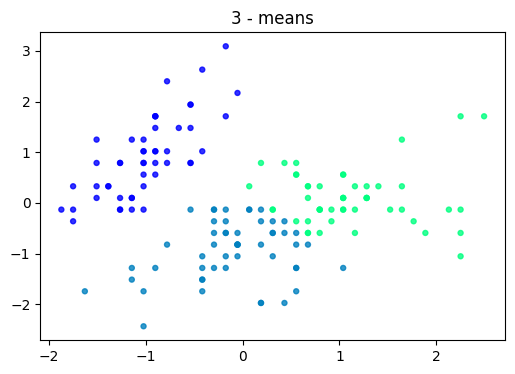

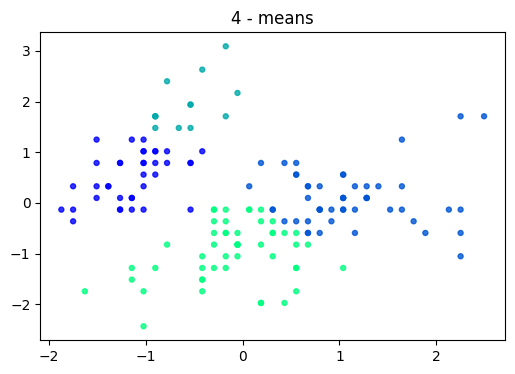

In [3]:
from sklearn.cluster import KMeans

repeat = [2,3,4]
for num in repeat:
  k = KMeans(n_clusters = num, max_iter = 150, random_state = 0)
  k.fit(X)
  fig, ax = plt.subplots(figsize = (6,4))
  plt.scatter(X[:,0],X[:,1], c = k.labels_, alpha = 0.8, s = 13, cmap=plt.cm.get_cmap("winter", num))
  plt.title(f"{num} - means")
